In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import f_oneway, chi2_contingency

In [2]:
# Load the CSV file
file_path = r"E:\My Work\Cources\Khondoker Islam Data Analyst\Python\Project_01\practice01.csv"
data = pd.read_csv(file_path)

In [3]:
# 1) Overall average tip
overall_avg_tip = data['tip'].mean()
print(f"1) The overall average tip is: {overall_avg_tip:.2f}")

1) The overall average tip is: 3.00


In [4]:
# 2) Statistical summary for numerical variables
numerical_summary = data.describe()
print("\n2) Statistical summary for numerical variables:")
print(numerical_summary)


2) Statistical summary for numerical variables:
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


In [5]:
# 2.1) Null values and percentages
null_values = data.isnull().sum()
null_percentage = (null_values / len(data)) * 100
print("\n2.1) Null values and percentages:")
print(pd.concat([null_values, null_percentage], axis=1, keys=['Null Values', 'Null Percentage']))


2.1) Null values and percentages:
            Null Values  Null Percentage
total_bill            0              0.0
tip                   0              0.0
sex                   0              0.0
smoker                0              0.0
day                   0              0.0
time                  0              0.0
size                  0              0.0


In [6]:
# 2.2) Numerical and Categorical variable names
numerical_columns = data.select_dtypes(include=['number']).columns.tolist()
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
print("\n2.2) Numerical columns:", numerical_columns)
print("Categorical columns:", categorical_columns)


2.2) Numerical columns: ['total_bill', 'tip', 'size']
Categorical columns: ['sex', 'smoker', 'day', 'time']


In [7]:
# 2.3) Relationship between Numerical and Categorical variables
# For ANOVA (Numerical vs Categorical)
female_tips = data[data['sex'] == 'Female']['tip']
male_tips = data[data['sex'] == 'Male']['tip']
f_statistic, p_value = f_oneway(female_tips, male_tips)
print("\n2.3) ANOVA results for 'tip' and 'sex':")
print(f"ANOVA results: F-statistic = {f_statistic}, p-value = {p_value}")
if p_value < 0.05:
    print("The difference in tips between genders is statistically significant.")
else:
    print("The difference in tips between genders is not statistically significant.")


2.3) ANOVA results for 'tip' and 'sex':
ANOVA results: F-statistic = 1.9261545619320046, p-value = 0.16645623503457202
The difference in tips between genders is not statistically significant.


In [8]:
# For Chi-Square (Categorical vs Categorical)
contingency_table = pd.crosstab(data['sex'], data['smoker'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print("\nChi-Square Test results for 'sex' and 'smoker':")
print(f"Chi-Square Test results: Chi2 = {chi2}, p-value = {p}")
if p < 0.05:
    print("There is a significant relationship between gender and smoking habits.")
else:
    print("There is no significant relationship between gender and smoking habits.")


Chi-Square Test results for 'sex' and 'smoker':
Chi-Square Test results: Chi2 = 0.008763290531773594, p-value = 0.925417020494423
There is no significant relationship between gender and smoking habits.


In [9]:
# 3) Statistical summary for 'tip'
tip_summary = data['tip'].describe()
print("\n3) Statistical summary for 'tip':")
print(tip_summary)


3) Statistical summary for 'tip':
count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64


In [10]:
# 4) Difference between mean and median for "tip"
mean_tip = data['tip'].mean()
median_tip = data['tip'].median()
difference = mean_tip - median_tip
print(f"\n4) Difference between mean and median for 'tip' is: {difference:.2f}")


4) Difference between mean and median for 'tip' is: 0.10


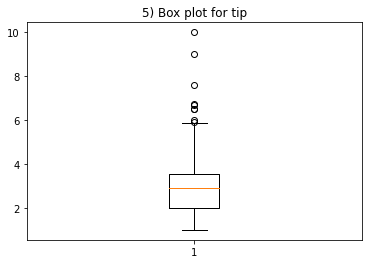

In [11]:
# 5) Box plot for 'tip' to identify outliers
plt.boxplot(data['tip'])
plt.title('5) Box plot for tip')
plt.show()

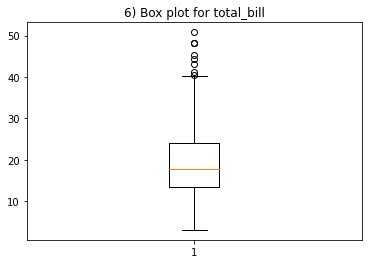

In [12]:
# 6) Box plot for 'total_bill' to identify outliers
plt.boxplot(data['total_bill'])
plt.title('6) Box plot for total_bill')
plt.show()

In [13]:
# 7) Percentage of males & females in the dataset
gender_percentage = data['sex'].value_counts(normalize=True) * 100
print("\n7) Percentage of males & females in the dataset:")
print(gender_percentage)


7) Percentage of males & females in the dataset:
Male      64.344262
Female    35.655738
Name: sex, dtype: float64


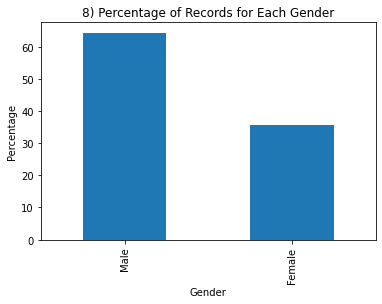

In [14]:
# 8) Bar plot representing the percentage of records for each gender
gender_counts = data['sex'].value_counts(normalize=True) * 100
gender_counts.plot(kind='bar', title='8) Percentage of Records for Each Gender')
plt.ylabel('Percentage')
plt.xlabel('Gender')
plt.show()

In [15]:
# 9) Find the average differentiate by gender and write your observation.
average_by_gender = data.groupby('sex')['tip'].mean()
print("\n9) Average tip by gender:")
print(average_by_gender)


9) Average tip by gender:
sex
Female    2.833448
Male      3.089618
Name: tip, dtype: float64


In [16]:
# 10) Find average tip according to day (i.e. weekday) write your observation on that
average_by_day = data.groupby('day')['tip'].mean()
print("\n10) Average tip by day:")
print(average_by_day)


10) Average tip by day:
day
Fri     2.734737
Sat     2.993103
Sun     3.255132
Thur    2.771452
Name: tip, dtype: float64


In [17]:
# 11) Find the average tip according to size (number of people at the table)
average_by_size = data.groupby('size')['tip'].mean()
print("\n11) Average tip by table size:")
print(average_by_size)


11) Average tip by table size:
size
1    1.437500
2    2.582308
3    3.393158
4    4.135405
5    4.028000
6    5.225000
Name: tip, dtype: float64


In [18]:
# 12) Is smokers' tip more than non-smokers?
smoker_tips = data[data['smoker'] == 'Yes']['tip']
non_smoker_tips = data[data['smoker'] == 'No']['tip']
mean_tip_smokers = smoker_tips.mean()
mean_tip_non_smokers = non_smoker_tips.mean()
print("\n12) Average tip for smokers and non-smokers:")
print(f"Average tip for smokers: {mean_tip_smokers:.2f}")
print(f"Average tip for non-smokers: {mean_tip_non_smokers:.2f}")
if mean_tip_smokers > mean_tip_non_smokers:
    print("Smokers tend to tip more than non-smokers.")
else:
    print("Non-smokers tend to tip more than smokers.")


12) Average tip for smokers and non-smokers:
Average tip for smokers: 3.01
Average tip for non-smokers: 2.99
Smokers tend to tip more than non-smokers.


In [19]:
# 13) Create a 2 by 2 and get the average tip size (Gender vs smoker and tip size).
# Which group tips the most?
# Hints (index will be sex, columns will be smoker, values will be tips)
grouped = data.groupby(['sex', 'smoker'])['tip'].mean().unstack()
print("\n13) Average tip by gender and smoker status:")
print(grouped)
if grouped.loc['Female', 'Yes'] > grouped.loc['Male', 'Yes']:
    print("Female smokers tend to tip more than male smokers.")
else:
    print("Male smokers tend to tip more than female smokers.")


13) Average tip by gender and smoker status:
smoker        No       Yes
sex                       
Female  2.773519  2.931515
Male    3.113402  3.051167
Male smokers tend to tip more than female smokers.


In [20]:
# 14) Create a column called 'pct_tip' = tip / total_bill - this would be giving 
# percentage of tip and should be a better measure of the tipping behavior.
data['pct_tip'] = data['tip'] / data['total_bill'] * 100

In [21]:
# 15) Find the relationships with 'pct_tip" to "sex", "size" write your observations
relationship_sex_pct_tip = data.groupby('sex')['pct_tip'].mean()
relationship_size_pct_tip = data.groupby('size')['pct_tip'].mean()
print("\n15) Relationships between 'pct_tip' and 'sex', 'size':")
print("Relationship with sex:")
print(relationship_sex_pct_tip)
print("Relationship with table size:")
print(relationship_size_pct_tip)


15) Relationships between 'pct_tip' and 'sex', 'size':
Relationship with sex:
sex
Female    16.649074
Male      15.765055
Name: pct_tip, dtype: float64
Relationship with table size:
size
1    21.729202
2    16.571919
3    15.215685
4    14.594901
5    14.149549
6    15.622920
Name: pct_tip, dtype: float64


In [22]:
# 16) Make the gender vs. smoker view using pct_tip (like task 13)
grouped_pct_tip = data.groupby(['sex', 'smoker'])['pct_tip'].mean().unstack()
print("\n16) Average pct_tip by gender and smoker status:")
print(grouped_pct_tip)


16) Average pct_tip by gender and smoker status:
smoker         No        Yes
sex                         
Female  15.692097  18.215035
Male    16.066872  15.277118


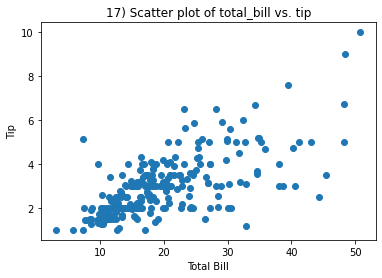

In [23]:
# 17) Make a scatter plot of total_bill vs. tip
plt.scatter(data['total_bill'], data['tip'])
plt.title('17) Scatter plot of total_bill vs. tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

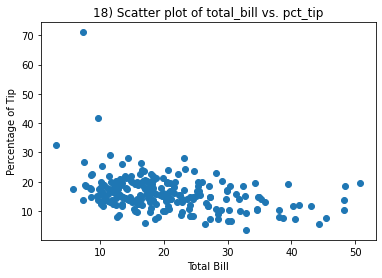

In [24]:
# 18) Make a scatter plot of total_bill vs. pct_tip
plt.scatter(data['total_bill'], data['pct_tip'])
plt.title('18) Scatter plot of total_bill vs. pct_tip')
plt.xlabel('Total Bill')
plt.ylabel('Percentage of Tip')
plt.show()

In [25]:
# 19) Describe or write your observations according to 17 and 18
print("\n19) Observations from scatter plots:")
print("Scatter plot of total_bill vs. tip: Shows the relationship between total bill and tip amount.")
print("Scatter plot of total_bill vs. pct_tip: Indicates the trend of tip percentage concerning total bill.")


19) Observations from scatter plots:
Scatter plot of total_bill vs. tip: Shows the relationship between total bill and tip amount.
Scatter plot of total_bill vs. pct_tip: Indicates the trend of tip percentage concerning total bill.


**Thank You**